## 1. Summary

The One Concern data science challenge practice requests to submit three different submission files using the same training and test datasets but different pre-defined problem conditions. Therefore,I proppose three different Machine Learning model to predict the target variables which are in a class labels [1,2,3].The models are developed in Python 3.5 and primary libraries used in this report are including:

•	**NumPy**: Provides a fast-numerical array structure and helper functions<br>
•	**pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently<br>
•	**scikit-learn**: The essential Machine Learning package in Python<br>
•	**matplotlib**: Basic plotting library in Python; most other Python plotting libraries are build on top of it<br>
•	**Seaborn**: Advanced statistical plotting library


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('C:/Users/ooppa/downloads') # my working directory

## 2. Exploratory data analysis

### 2.1 Checking data files

In [3]:
#Read data
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

At first, I wanted to check if “ train.csv” and “test.csv” files have any missing data and what datatype has stored in each feature. 

In [ ]:
df_train.info()

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16641 entries, 0 to 16640
Data columns (total 16 columns):
x1    16641 non-null float64
x2    16641 non-null float64
x3    16641 non-null float64
x4    16641 non-null float64
x5    16641 non-null float64
y1    16641 non-null float64
y2    16641 non-null float64
y3    16641 non-null float64
y4    16641 non-null float64
y5    16641 non-null float64
y6    16641 non-null float64
z1    16641 non-null float64
z2    16641 non-null float64
z3    16641 non-null float64
z4    16641 non-null float64
z5    16641 non-null float64
dtypes: float64(16)
memory usage: 2.0 MB


Luckily, both “train.csv” and “test.csv” don’t include any missing data, so I don’t need to worry about the missing data imputation. 
### 2.2 Summary statistics
I have awared that the prediction column ‘label’ include only three class numbers, and features are scaled. To further examine the spread of data in the training dataset, the descriptive stats of training data is shown in below.

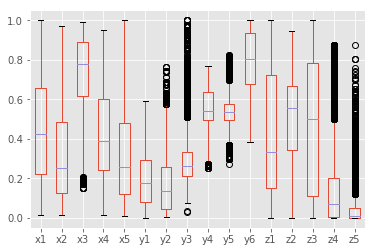

In [6]:
plt.style.use('ggplot')
df_train.drop('label',axis=1).boxplot();

The figue is Boxplot of training data attributes. The upper and lower boundaries of the boxes show the 75th and 25th percentile, the whiskers of the box plot show the maximum and minimum values, and the red line within the box is the median value. Black cross symbols indicated the outliers. We can observe that every feature is well scaled from 0 to 1. 
### 2.3 Corrlation test

Next, I wanted to check if any features corrlated to each other. 

In [7]:
#paiwise correlation
df_train.drop('label',axis=1).corr(method='pearson').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5
x1,1.0,0.94,0.93,0.98,0.94,-0.86,0.64,0.085,0.77,0.67,0.91,-0.94,0.43,0.94,0.77,0.66
x2,0.94,1.0,0.88,0.95,0.99,-0.8,0.61,-0.019,0.82,0.76,0.83,-0.86,0.31,0.88,0.75,0.67
x3,0.93,0.88,1.0,0.93,0.88,-0.8,0.58,-0.005,0.76,0.59,0.94,-0.94,0.58,0.9,0.68,0.56
x4,0.98,0.95,0.93,1.0,0.95,-0.82,0.68,0.066,0.78,0.67,0.9,-0.92,0.42,0.92,0.75,0.65
x5,0.94,0.99,0.88,0.95,1.0,-0.79,0.62,-0.04,0.84,0.74,0.83,-0.86,0.32,0.88,0.74,0.65
y1,-0.86,-0.8,-0.8,-0.82,-0.79,1.0,-0.54,-0.17,-0.65,-0.63,-0.92,0.89,-0.54,-0.88,-0.65,-0.52
y2,0.64,0.61,0.58,0.68,0.62,-0.54,1.0,0.41,0.4,0.44,0.62,-0.57,0.25,0.58,0.47,0.42
y3,0.085,-0.019,-0.005,0.066,-0.04,-0.17,0.41,1.0,-0.46,0.018,0.12,-0.13,0.19,0.097,0.038,0.037
y4,0.77,0.82,0.76,0.78,0.84,-0.65,0.4,-0.46,1.0,0.65,0.73,-0.69,0.22,0.71,0.61,0.54
y5,0.67,0.76,0.59,0.67,0.74,-0.63,0.44,0.018,0.65,1.0,0.58,-0.63,0.21,0.63,0.56,0.52


From the pairwised corrlation heatmap, we can see that feture x1,x2,x3,x4,x5 and z3 are highly correlated to each other. Correlated fetures sometimes worsen the model performance. 

### 2.4 Feature importance
In order to select best feture among the correlated fetures, I built the baseline model using RandomForestClassifier to rank the importance of the features.

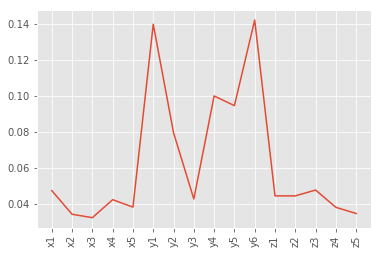

In [8]:
from sklearn.ensemble import RandomForestClassifier
X=df_train.drop('label',axis=1)
y=df_train.label

rf=RandomForestClassifier()
rf.fit(X,y)

import matplotlib.pyplot as plt
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]),X.columns.tolist(), rotation=90);

The grapgh shows the feture importances. The most important two features are y1 and y6. In the highly correlated data x1,x2, x3, x4, x5, and z3, the most important feature is x1. 

### 2.5 Imbalanced Classes

From the previous exploration, the training dataset is clean and well scaled. Now I have to check if the label clases are imbalanced or not.

In [9]:
df_train.label.value_counts()

1    37064
2     1426
3      339
Name: label, dtype: int64

Majority of label classified as "1", so this is the imbalance multiclass classification problem.

## 3. Data processing and feature engineering

Before processing imbalanced dataset, I performed feature selection first. That is remove all correlated features to x1.  

In [10]:
df_train_F=df_train.drop(['x2','x3','x4','x5','z3'],axis=1)
df_train_F.head()

,x1,y1,y2,y3,y4,y5,y6,z1,z2,z4,z5,label
0,0.874424,0.064458,0.399405,0.400940,0.665386,0.749402,0.962733,0.059650,0.392512,0.377613,0.157010,1
1,0.169331,0.327532,0.023786,0.161728,0.539730,0.487391,0.663999,0.838974,0.258899,0.002095,0.000144,1
2,0.329992,0.260328,0.091179,0.375606,0.455247,0.500023,0.728747,0.484457,0.633725,0.036536,0.004947,1
3,0.176104,0.415192,0.015857,0.154121,0.526295,0.434409,0.592285,0.823823,0.280367,0.002547,0.000182,1
4,0.971552,0.046714,0.329039,0.304118,0.697514,0.660573,0.979338,0.082224,0.459216,0.325817,0.118351,1


If we train our model with training dataset provided, the classification model might not able to predict the class lables "2" and "3" since most classes are labeled "1". In this case, I implemented Oversampling technique, that is, created replicated minority instances to increase their population.  

In [11]:
from sklearn.utils import resample
# Seperate majority and minority classes
df_majority=df_train_F[df_train_F.label==1]
df_minority_1=df_train_F[df_train_F.label==2]
df_minority_2=df_train_F[df_train_F.label==3]

#Upsample minority class
df_mi1_up=resample(df_minority_1,
                 replace=True,      #sample with replacement
                 n_samples=37064,   # to match majority class
                 random_state=123)  # reproducible results

df_mi2_up=resample(df_minority_2,
                 replace=True,      #sample with replacement
                 n_samples=37064,   # to match majority class
                 random_state=123)  # reproducible results
# Combine majority class with unsampled minority class
df_up=pd.concat([df_majority,df_mi1_up,df_mi2_up])
df_up.label.value_counts()

3    37064
2    37064
1    37064
Name: label, dtype: int64

In [12]:
#seperate dataset to training and evaluatin 
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_up, test_size=0.2, random_state=1)
X_train=data_train.drop('label',axis=1)
X_test=data_test.drop('label',axis=1)
y_train=data_train.label
y_test=data_test.label

Now, the new dataframe has more observations than the original and the ratio of the three classes are now 1:1:1.

## 4. Answers for the first part of challenge questions

### ***a. Any data processing and feature engineering?*** <br>
**Answer**: Please see the section 3.

### ***b. Which ML model was used and why*** <br>
**Answer**:After resample the training data, I selected three base learners for the classifation task. They are Random Forest, Logistic Regression and Decision Tree. Decision tree algorithms are the most widely used approaches for imbalanced class problems. Bagging with tree algorithms is a good idea since the aggregation is effective against the instability of trees by reducing the variance in the MSE. In contrast, more stable models such as logistic regression are not appropriate as the base learner.Random Forests are extensions of decision trees, they are robust and easy-to-interpret. In the following step, I will train the selected classifiers using resampled data. Using evaluation matrics which described in the next question to find out the best performance learning algorithms.


In [45]:
# Train random forest model
from sklearn.ensemble import RandomForestClassifier

# Train model
clf_1= RandomForestClassifier()
clf_1.fit(X_train, y_train)

# Predict on original training set
pred_y_1 = clf_1.predict(X_test)

In [14]:
#Train logistic regression classifier
from sklearn.linear_model import LogisticRegression
clf_2=LogisticRegression()
clf_2.fit(X_train, y_train)
pred_y_2=clf_2.predict(X_test)

Decision Tree model is the most widely used classifer for the imbalance class data. 

In [15]:
#Train DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier
clf_3 = DecisionTreeClassifier(random_state=0)
clf_3.fit(X_train, y_train)
pred_y_3=clf_3.predict(X_test)

### ***c. What evaluation metrics were used for validation and why?***<br>
**Answer**: In the class imbalance problem, the effectiveness of accuracy (or error rate)is not suitable for determining the performance of a classifiers. In our case, minority data only reprents 4.8% of the data, if the classifier only predicts the majority class, the classifier will have an accuracy of 95.2%. Therefore, I choose "confusion matrix", "Precision and Recall" and "F1 score". 

Common method for deformance of a classifier is through the use of a confusion matrix.

<function matplotlib.pyplot.show>

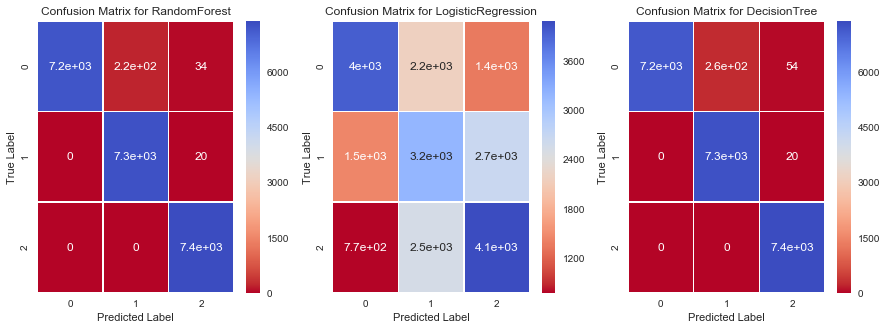

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_y_1=confusion_matrix(y_test, pred_y_1) #RandomForest 
cnf_y_2=confusion_matrix(y_test, pred_y_2) #logistic regression 
cnf_y_3=confusion_matrix(y_test, pred_y_3) # DecisionTree

fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.heatmap(cnf_y_1,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax1)
ax1.set_title('Confusion Matrix for RandomForest')
ax1.set_ylabel('True Label')
ax1.set_xlabel('Predicted Label')


sns.heatmap(cnf_y_2,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax2)
ax2.set_title('Confusion Matrix for LogisticRegression')
ax2.set_ylabel('True Label')
ax2.set_xlabel('Predicted Label')

sns.heatmap(cnf_y_3,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax3)
ax3.set_title('Confusion Matrix for DecisionTree')
ax3.set_ylabel('True Label')
ax3.set_xlabel('Predicted Label')

plt.show

Precision measures how often an instance that was predicted as positive that is actually positive, while recall measures how
often a positive class instance in the dataset was predicted as a positive class instance by the classifier. In imbalanced datasets, the goal is to improve recall without hurting precision. F-1 score is a metric that attempts to measure the trade-offs between precision and recall by outputting a single value that reflects the goodness of a classifier in the presence of rare
classes.

In [18]:
from sklearn.metrics import classification_report
print('--------------Classification Report for RandomForest--------------')
print(classification_report(y_test, pred_y_1))
print('--------------Classification Report for LogisticRegrssion--------------')
print(classification_report(y_test, pred_y_2))
print('--------------Classification Report for Decisiontree--------------')
print(classification_report(y_test, pred_y_3))

--------------Classification Report for RandomForest--------------
             precision    recall  f1-score   support

          1       1.00      0.97      0.98      7505
          2       0.97      1.00      0.98      7326
          3       0.99      1.00      1.00      7408

avg / total       0.99      0.99      0.99     22239

--------------Classification Report for LogisticRegrssion--------------
             precision    recall  f1-score   support

          1       0.64      0.53      0.58      7505
          2       0.40      0.44      0.42      7326
          3       0.50      0.55      0.53      7408

avg / total       0.52      0.51      0.51     22239

--------------Classification Report for Decisiontree--------------
             precision    recall  f1-score   support

          1       1.00      0.96      0.98      7505
          2       0.97      1.00      0.98      7326
          3       0.99      1.00      1.00      7408

avg / total       0.99      0.98      0.98  

From the evaluation matrics, Both Randomforest and decision tree classifier perfoms faily good, Random Forest perfoms slightly better than Decision tree.I will use the trained Random forests classifier to predict the target varibales in "test.csv".(This answers the question e in the first part challenge)

In [19]:
df_test_F=df_test.drop(['x2','x3','x4','x5','z3'],axis=1)
pred_test=pd.DataFrame(clf_1.predict(df_test_F),columns=['label'])
Result_1=pd.concat([df_test,pred_test],axis=1)
Result_1.to_csv('predictd_labels_1.csv',header=True)

###  ***d. Anything interesting about the data (if any)***

**Answer**: THere are highly correlated features, please see Section 2.3

In [20]:
df_train[df_train['x1'] == 1]

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,label
49,1.0,0.673176,0.954751,0.846494,0.652845,0.043173,0.316155,0.241141,0.738785,0.663003,0.982182,0.050233,0.528501,0.984326,0.304680,0.072776,1
360,1.0,0.673176,0.954751,0.846494,0.652845,0.047890,0.345887,0.433517,0.621459,0.609218,0.978356,0.103047,0.705387,0.869590,0.184405,0.032474,2
10528,1.0,0.673176,0.954751,0.846494,0.652845,0.042815,0.316155,0.241141,0.738785,0.663003,0.982460,0.038405,0.310532,0.873686,0.437736,0.217088,1
16896,1.0,0.673176,0.954751,0.846494,0.652845,0.043399,0.299306,0.241141,0.735843,0.657706,0.982006,0.050233,0.528501,0.984326,0.304680,0.072776,1
19844,1.0,0.673176,0.954751,0.846494,0.652845,0.048582,0.345887,0.433517,0.621459,0.609218,0.977769,0.103047,0.705387,0.869590,0.184405,0.032474,1
24589,1.0,0.673176,0.954751,0.846494,0.652845,0.043243,0.299306,0.241141,0.735843,0.657706,0.982127,0.050233,0.528501,0.984326,0.304680,0.072776,1
25477,1.0,0.673176,0.954751,0.846494,0.652845,0.048295,0.345887,0.433517,0.621459,0.609218,0.978013,0.038405,0.310532,0.873686,0.437736,0.217088,1
27553,1.0,0.673176,0.954751,0.846494,0.652845,0.043627,0.299306,0.241141,0.735843,0.657706,0.981827,0.050233,0.528501,0.984326,0.304680,0.072776,1


In [21]:
df_test[df_test['x1'] == 1]

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5
2059,1.0,0.673176,0.954751,0.846494,0.652845,0.042601,0.316155,0.241141,0.738785,0.663003,0.982625,0.082224,0.459216,0.896192,0.325817,0.118351
5139,1.0,0.673176,0.954751,0.846494,0.652845,0.044665,0.303271,0.228324,0.739894,0.660438,0.981005,0.038405,0.310532,0.873686,0.437736,0.217088
8611,1.0,0.673176,0.954751,0.846494,0.652845,0.048851,0.345887,0.433517,0.621459,0.609218,0.977539,0.105679,0.711488,0.863339,0.180380,0.031402
15194,1.0,0.673176,0.954751,0.846494,0.652845,0.048113,0.345887,0.433517,0.621459,0.609218,0.978167,0.105679,0.711488,0.863339,0.180380,0.031402


## 5. Answers for the second part of challenge questions

###  It is known that the aforementioned labels have an inherent ranking in them. However, the distances between subsequent ranks are arbitrary. For example, the label “3” is not thrice as good/bad as the label “1”.

### a. Will you change your ML approach to solve this problem? If so, how? If not, why?
**Answer**: Yes, think of the target variable now is ordinary variable, the problem becomes ordinary regression problem. In this case, we have to chage our classifier to predict regression problem.

### b. Should you choose to change your machine learning approach, describe your approach in detail, and explain the models you considered for implementation. Finally, compute labels for the data in “ test.csv ”, and give your predictions in a file named “ predicted_labels_2.csv ”.

**Answer**:For the ordinary regression problem, "mord" (multiclassfier for ordinary regression) moldule is used.  

In [241]:

import mord as m
clf_4 = m.LogisticIT()
clf_4.fit(X_train,y_train)
pred_y_4=clf_4.predict(X_test)

pred_test=pd.DataFrame(clf_4.predict(df_test_F),columns=['label'])
Result_1=pd.concat([df_test,pred_test],axis=1)
Result_1.to_csv('predictd_labels_2.csv',header=True)


TypeError: 'LogisticRegression' object is not callable

## 5. Answers for the second part of challenge questions

### The labels have unequal importance, in the sense that we want to penalize the model most if it misclassified label 3, a little less for 2 and the least for label 1. Additionally, in case of a misclassification, it is preferable to over-predict a label than under-predict (i.e. misclassifying label 3 as 2 is worse than misclassifying label 2 as 3).***<br>

### a. In your report, describe how you would design a machine learning pipeline that deals with these new constraints? 
**Answer**: Many machine learning toolkits have ways to adjust the “importance” of classes. In ordert to consider the above constrains in my classifier,I specified the "class_weight" as {1:0.1,2:0.4,3:0.5}. In this way, higher weight assigned to minority classes. And the class 3 gained more importance because it us preferable to over-predict a label than under-predict a label data.

### b. Develop a classification model with these new constraints. Run this model against the data points in “ test.csv ” and give your predictions in a file named “ predicted_labels_3.csv ”.

--------------Classification Report--------------
             precision    recall  f1-score   support

          1       1.00      0.97      0.98      7505
          2       0.97      1.00      0.99      7326
          3       0.99      1.00      1.00      7408

avg / total       0.99      0.99      0.99     22239



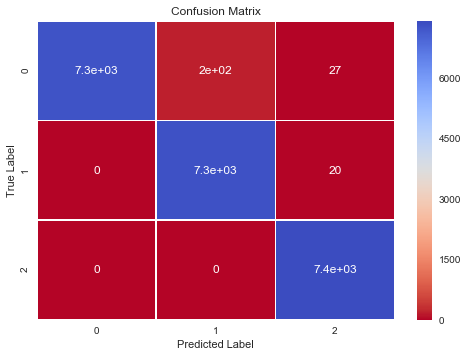

In [36]:
# Train random forest model
from sklearn.ensemble import RandomForestClassifier

# Train model
clf_7= RandomForestClassifier(class_weight={1:0.1,2:0.4,3:0.5})
clf_7.fit(X_train, y_train)

# Predict on original training set
pred_y_7 = clf_7.predict(X_test)

# We choose confusion matrix for a general purpose metric for classification
cnf_y_7=confusion_matrix(y_test, pred_y_7)


#fig = plt.figure(figsize=(15,5))
#ax=fig.add_subplot(1,2,1)
sns.heatmap(cnf_y_7,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show

print('--------------Classification Report--------------')
print(classification_report(y_test, pred_y_7))

pred_test=pd.DataFrame(clf_7.predict(df_test_F),columns=['label'])
Result_1=pd.concat([df_test,pred_test],axis=1)
Result_1.to_csv('predictd_labels_3.csv',header=True)

## Ending Notes

During the data processing, the training and validation data sets were seprerated after oversampling, which might not the right way for resampling the data. Other oversampling algorithms like Synthetic Minority Over-sampling Technique (SMOTE) can be used to generate synthetic datasets. The Machine Learning model (RandomForestClassifier) alreaday outperformed in validating datasets. So furhter challege question assumptions didn't improve the model performance. This might be due to inaccurate oversampling processes. 